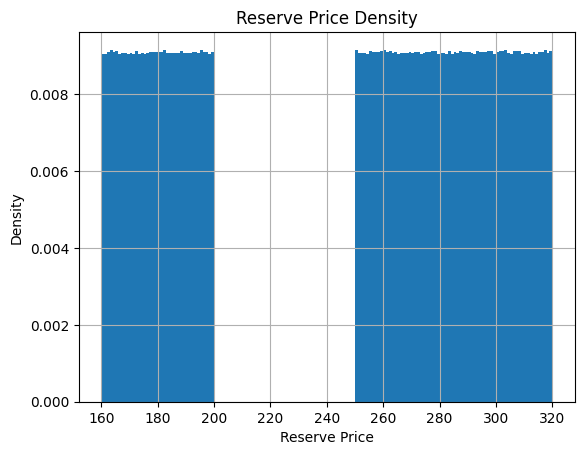

In [58]:
import numpy as np
import matplotlib.pyplot as plt

num_turtles = 10_000_000

length_low = 200 - 160
length_high = 320 - 250
total_length = length_low + length_high
prob_low = length_low / total_length
prob_high = length_high / total_length

choices = np.random.rand(num_turtles)
reserves = np.empty(num_turtles)

low_mask = choices < prob_low
high_mask = ~low_mask

reserves[low_mask] = np.random.uniform(160, 200, size=low_mask.sum())
reserves[high_mask] = np.random.uniform(250, 320, size=high_mask.sum())

plt.hist(reserves, bins=160, range=(160, 320), density=True)
plt.title("Reserve Price Density")
plt.xlabel("Reserve Price")
plt.ylabel("Density")
plt.grid(True)
plt.show()

Optimal bid: 200
Expected profit per turtle: 43.61


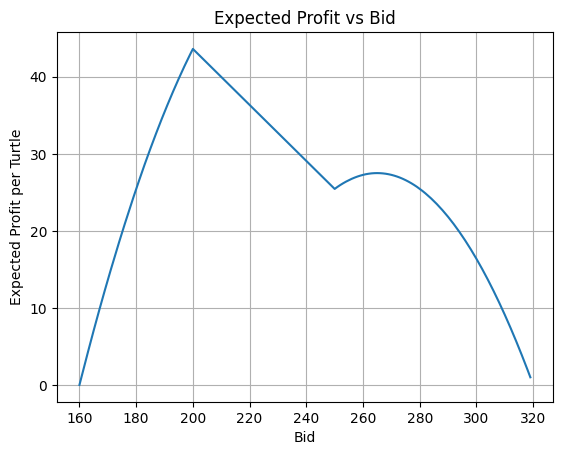

In [59]:
selling_price = 320

bids = np.arange(160, 320)
optimal_bid = 160

expected_profits = []
max_expected_profit = -np.inf

for bid in bids:
    num_accepted = (reserves < bid).sum()
    profit_per_item = selling_price - bid
    expected_profit = num_accepted * profit_per_item / num_turtles

    expected_profits.append(expected_profit)

    if expected_profit > max_expected_profit:
        optimal_bid = bid
        max_expected_profit = expected_profit

print(f"Optimal bid: {optimal_bid}")
print(f"Expected profit per turtle: {max_expected_profit:.2f}")

plt.plot(bids, expected_profits)
plt.title("Expected Profit vs Bid")
plt.xlabel("Bid")
plt.ylabel("Expected Profit per Turtle")
plt.grid(True)
plt.show()

Optimal bid: 300
Expected profit per turtle: 16.36


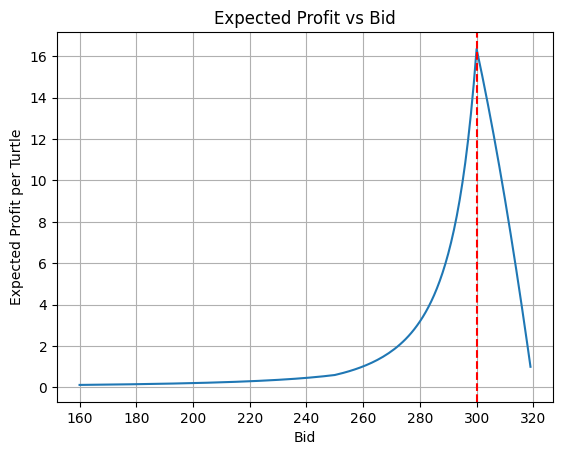

In [60]:
reserves[low_mask] = 0

average_bid = 300

bids = np.arange(160, 320)
optimal_bid = 160

expected_profits = []
max_expected_profit = -np.inf

for bid in bids:
    num_accepted = (reserves < bid).sum()

    if bid >= average_bid:
        profit_per_item = selling_price - bid
    else:
        p = ((320 - average_bid) / (320 - bid)) ** 3
        profit_per_item = p * (selling_price - bid)

    expected_profit = num_accepted * profit_per_item / num_turtles
    expected_profits.append(expected_profit)

    if expected_profit > max_expected_profit:
        optimal_bid = bid
        max_expected_profit = expected_profit

print(f"Optimal bid: {optimal_bid}")
print(f"Expected profit per turtle: {max_expected_profit:.2f}")

plt.plot(bids, expected_profits)
plt.axvline(x=average_bid, color='r', linestyle='--', label='Average Bid')
plt.title("Expected Profit vs Bid")
plt.xlabel("Bid")
plt.ylabel("Expected Profit per Turtle")
plt.grid(True)
plt.show()